In [81]:
import numpy as np
from skimage import io
from skimage.transform import resize
import util as ut

### A2 Teil 2

Image 1:


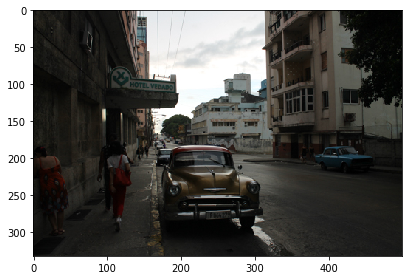

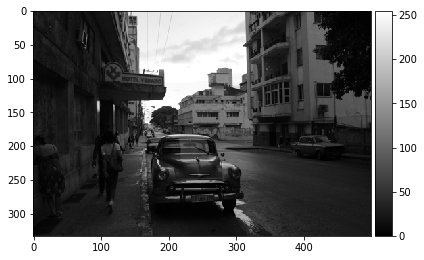

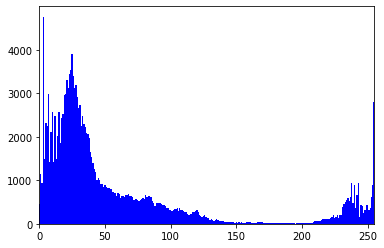

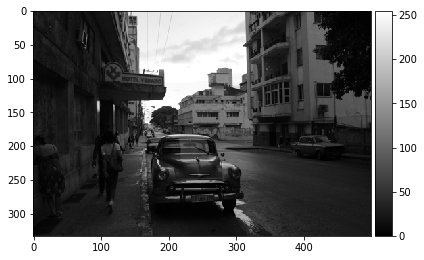

In [ ]:
def cum_histo(histo, normalized=True):
    cum_his = np.zeros(histo.shape, int)
    for i, entry in enumerate(histo):
        if i == 0:
            cum_his[i] = histo[i]
        else:
            cum_his[i] = cum_his[i-1] + histo[i]
    if normalized:
        return cum_his / cum_his[- 1]
    return cum_his


img_1 = io.imread("A2/bild01.jpg")
print("Image 1:")
ut.printImage(img_1)

# Histogramm img 1
gray_img_1 = ut.rgb2gray(img_1)
histo_gray_img_1 = ut.computeHisto(gray_img_1)
ut.printHisto(histo_gray_img_1, gray_img_1)

# Kummuliertes Histogramm img 1
cum_histo_img_1 = cum_histo(histo_gray_img_1)
ut.printHisto(cum_histo_img_1, gray_img_1)

img_2 = io.imread("A2/bild02.jpg")
print("Image 2:")
ut.printImage(img_2)

# Histogramm img 2
gray_img_2 = ut.rgb2gray(img_2)
histo_gray_img_2 = ut.computeHisto(gray_img_2)
ut.printHisto(histo_gray_img_2, gray_img_2)

# Kummuliertes Histogramm img 2
cum_histo_img_2 = cum_histo(histo_gray_img_2)
ut.printHisto(cum_histo_img_2)

# A2 Teil 3

## Fragen:

### a) Was ist eine homogene und was eine nicht-homogene Punktoperation?

homogen: unabhängig von den Pixelkoordinaten
nicht-homogen: abhängig von den Pixelkoordinaten


### Was ist der Unterschied zwischen Punktoperationen und Filteroperationen?
Punktoperationen berücksichtigen nur die Informationen des jeweils betrachteten Pixels.
Filteroperationen hingegen beachten auch das direkte Umfeld des jeweiligen Pixels, wodurch beispielsweise
Filter existieren können, die Kanten hervorheben können, o.Ä.


# A2 Teil 4

In [ ]:
def match_Histo(img_histo, ref_histo):
    max = 256
    lut = np.arange(0, max, 1)
    for a in lut:
        j = max - 1
        while True:
            lut[a] = j
            j = j - 1
            if ((j >= 0) and (img_histo[a] >= ref_histo[j])):
                break
    return lut

In [ ]:
# read img
img_1 = io.imread("A2/bild01.jpg")
img_2 = io.imread("A2/bild02.jpg")
                       
# transform to grayscale
gray_img_1 = ut.rgb2gray(img_1)
gray_img_2 = ut.rgb2gray(img_2)

# create histo
histo_gray_img_1 = ut.computeHisto(gray_img_1)
histo_gray_img_2 = ut.computeHisto(gray_img_2)

# create cum_histo
cum_histo_img_1 = cum_histo(histo_gray_img_1)
cum_histo_img_2 = cum_histo(histo_gray_img_2)

# create lut
lut = match_Histo(cum_histo_img_1, cum_histo_img_2)

# transform img
lut_img = ut.apply_lut(gray_img_1, lut)

# print
print("Image 1 and 2:")
ut.printHisto(cum_histo_img_1, gray_img_1)
ut.printHisto(cum_histo_img_2, gray_img_2)

print("Image 1 modified with lut")
new_histo = ut.computeHisto(lut_img)
new_cum_histo = cum_histo(new_histo)
ut.printHisto(new_cum_histo, lut_img)


### Warum müssen die beiden Histogramme des Referenz- und des Originalbildes normiert sein? (Denken Sie an den Histogrammausgleich)

Sind die beiden Bilder nicht gleich groß, bzw. haben nicht die selbe Anzahl an Pixeln, so wird nur ein Teil
des Referenzhistogramms berücksichtigt oder das Referenzhistogramm reicht nicht, um das gesamte Original-
Histogramm anzupassen.